In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
medal_by_country = pd.read_csv('data/medal_by_country_coor.csv')
medal_by_country

,country,gold,silver,bronze,total,longitude,latitude,class
0,FR Germany,289,218,198,1501,10.451526,51.165691,1
1,Sweden,190,205,143,1123,18.643501,60.128161,1
2,Belgium,79,73,70,453,4.469936,50.503887,1
3,Great Britain,439,502,483,2804,-3.435973,55.378051,1
4,Netherlands,189,239,237,1282,5.291266,52.132633,1
...,...,...,...,...,...,...,...,...
110,Syria,0,0,1,1,38.996815,34.802075,4
111,Kazakhstan,1,1,0,5,66.923684,48.019573,4
112,Faroe Islands,1,7,5,22,-6.911806,61.892635,4
113,Peru,2,1,2,10,-75.015152,-9.189967,4


In [3]:
x = np.arange(115).reshape(-1, 1)
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [4]:
y_gold = []
y_silver = []
y_bronze = []
for gold,silver,bronze in zip(medal_by_country["gold"],medal_by_country["silver"],medal_by_country["bronze"]):
    if gold > 0:
        y_gold.append(1)
    else:
        y_gold.append(0)
    if silver > 0:
        y_silver.append(1)
    else:
        y_silver.append(0)
    if bronze > 0:
        y_bronze.append(1)
    else:
        y_bronze.append(0)

In [5]:
def logistic_regression(x,y):
    data = pd.DataFrame()
    data["x"] = np.arange(115)
    data["y"] = y
    model = LogisticRegression(solver='liblinear', random_state=0)
    model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
    print("model.classes_ , model.intercept_ , model.coef_:" ,model.classes_ , model.intercept_ , model.coef_)
    #print("model.predict_proba:",model.predict_proba(x))
    #print("model.predict(x):",model.predict(x))
    print("model.score:",model.score(x, y_gold))
    print("confusion_matrix:",confusion_matrix(y, model.predict(x)))
    cm = confusion_matrix(y, model.predict(x))

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    print(classification_report(y, model.predict(x)))
    plt.figure(figsize = (15,8))
    sns.regplot(x=x, y=y, data=data, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})


model.classes_ , model.intercept_ , model.coef_: [0 1] [3.14397395] [[-0.02698164]]
model.score: 0.8260869565217391
confusion_matrix: [[ 0 20]
 [ 0 95]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.83      1.00      0.90        95

    accuracy                           0.83       115
   macro avg       0.41      0.50      0.45       115
weighted avg       0.68      0.83      0.75       115



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


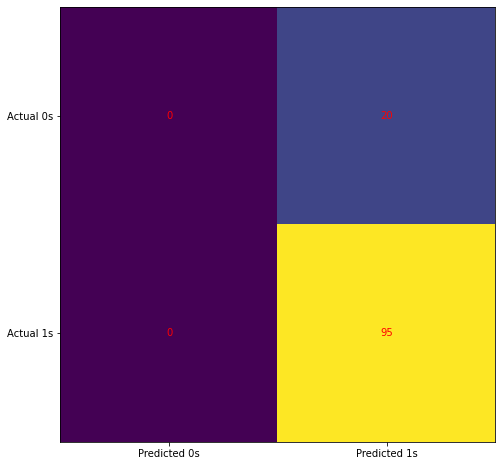

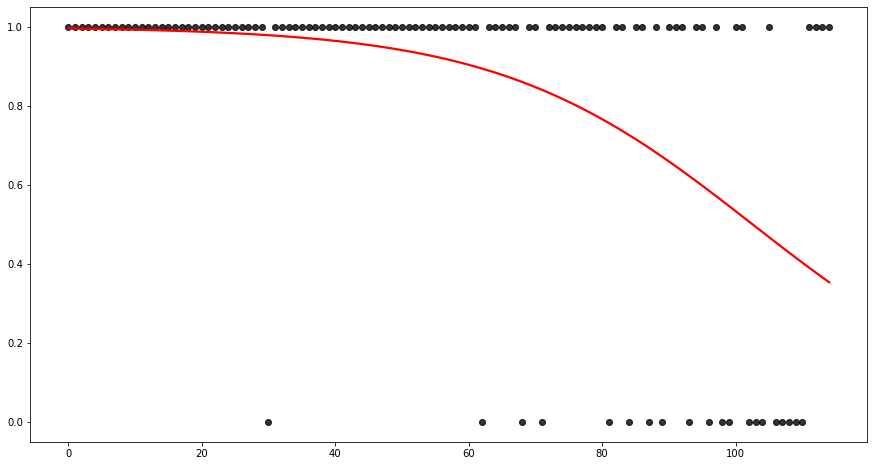

In [6]:
logistic_regression(x,y_gold)

model.classes_ , model.intercept_ , model.coef_: [0 1] [3.21359235] [[-0.0245016]]
model.score: 0.8260869565217391
confusion_matrix: [[ 0 16]
 [ 0 99]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.86      1.00      0.93        99

    accuracy                           0.86       115
   macro avg       0.43      0.50      0.46       115
weighted avg       0.74      0.86      0.80       115



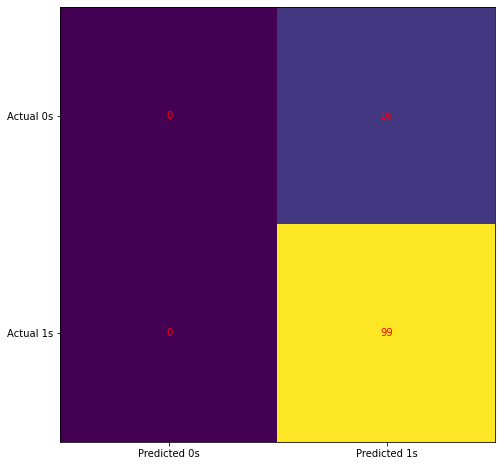

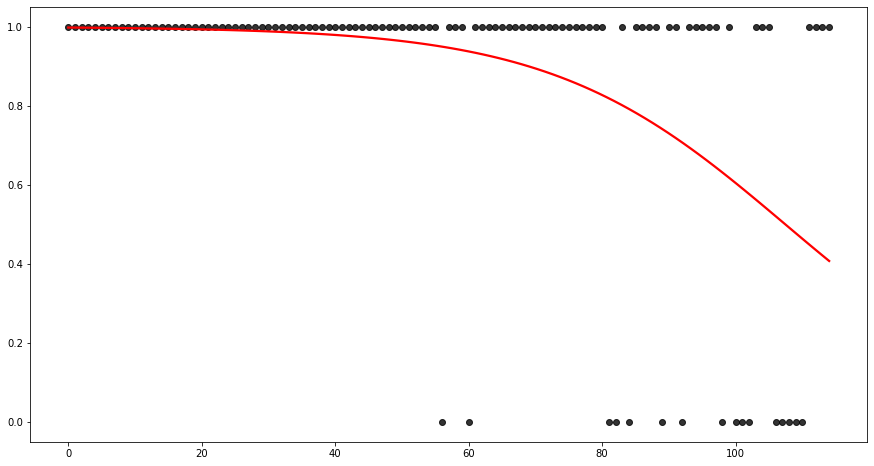

In [7]:
logistic_regression(x,y_silver)

model.classes_ , model.intercept_ , model.coef_: [0 1] [2.97271014] [[-0.01568323]]
model.score: 0.8260869565217391
confusion_matrix: [[  0  11]
 [  0 104]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.90      1.00      0.95       104

    accuracy                           0.90       115
   macro avg       0.45      0.50      0.47       115
weighted avg       0.82      0.90      0.86       115



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


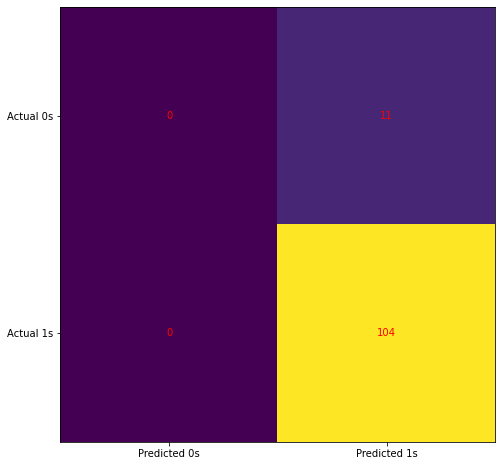

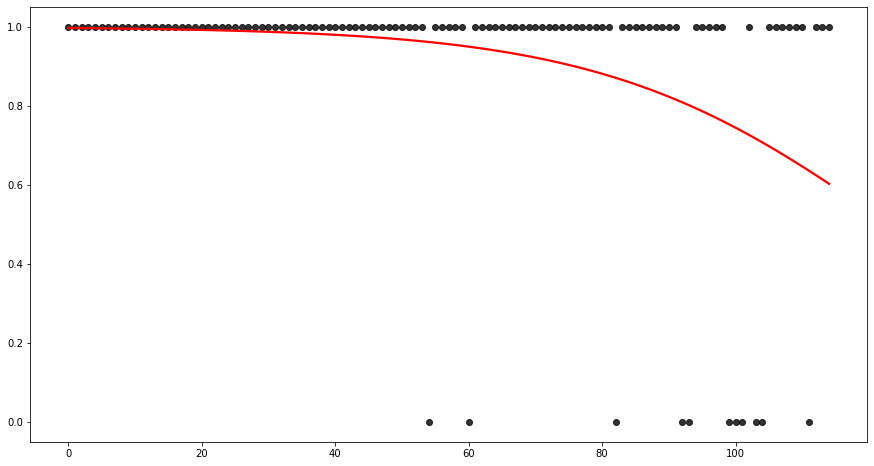

In [8]:
logistic_regression(x,y_bronze)

In [9]:
def LR_statsModels(x_input,y):
    x = sm.add_constant(x_input)
    model = sm.Logit(y, x)
    result = model.fit(method='newton')
    print(result.summary())
    print(result.summary2())

In [10]:
LR_statsModels(x,y_gold)

Optimization terminated successfully.
         Current function value: 0.336878
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                      113
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 May 2022   Pseudo R-squ.:                  0.2709
Time:                        18:41:12   Log-Likelihood:                -38.741
converged:                       True   LL-Null:                       -53.134
Covariance Type:            nonrobust   LLR p-value:                 8.081e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3957      1.117      4.829      0.000       3.206       7.586
x1            -0.0526      0.

In [30]:
def handwriting_recognition(x,y):
    x, y = load_digits(return_X_y=True)
    #print(x,y)
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',random_state=0)
    model.fit(x_train, y_train)
    x_test = scaler.transform(x_test)
    y_pred = model.predict(x_test)
    print("Model Score train:",model.score(x_train, y_train))
    print("Model Score test",model.score(x_test, y_test))
    print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', fontsize=10, color='black')
    ax.set_ylabel('Actual outputs', fontsize=10, color='black')
    ax.xaxis.set(ticks=range(10))
    ax.yaxis.set(ticks=range(10))
    ax.set_ylim(9.5, -0.5)
    for i in range(10):
        for j in range(10):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
    plt.show()

Model Score train: 0.964509394572025
Model Score test 0.9416666666666667
Confusion Matrix: [[27  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  1  0  1  1]
 [ 1  1 33  1  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  2  1  2  0  0  0  1 33  0]
 [ 0  0  0  1  0  1  0  2  1 36]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88    

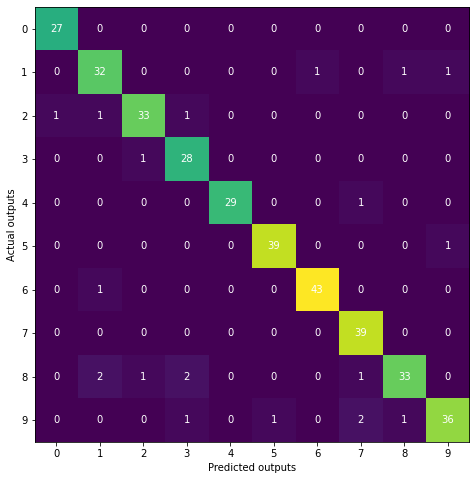

In [31]:
handwriting_recognition(x,y_gold)

Model Score train: 0.964509394572025
Model Score test 0.9416666666666667
Confusion Matrix: [[27  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  1  0  1  1]
 [ 1  1 33  1  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  2  1  2  0  0  0  1 33  0]
 [ 0  0  0  1  0  1  0  2  1 36]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88    

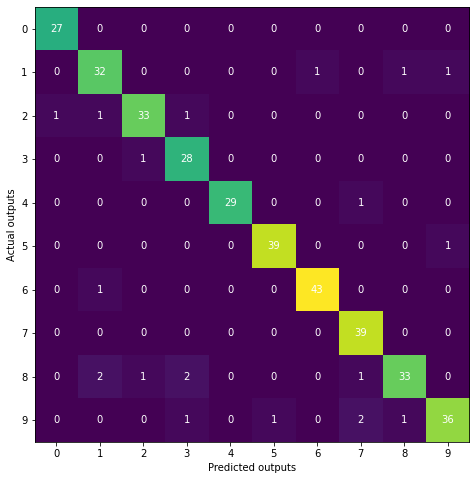

In [32]:
handwriting_recognition(x,y_silver)

Model Score train: 0.964509394572025
Model Score test 0.9416666666666667
Confusion Matrix: [[27  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  1  0  1  1]
 [ 1  1 33  1  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  2  1  2  0  0  0  1 33  0]
 [ 0  0  0  1  0  1  0  2  1 36]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88    

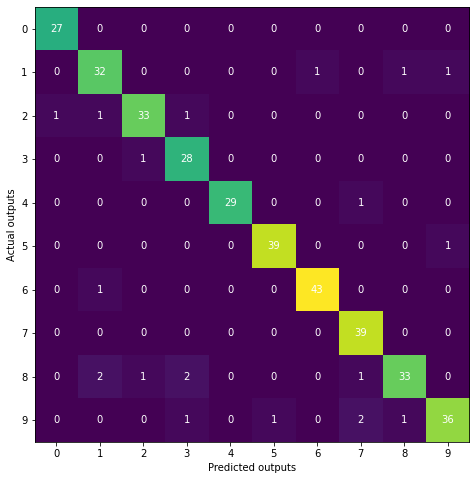

In [33]:
handwriting_recognition(x,y_bronze)